# Welcome to BAA session on intricate cycles!

## Intro content and session premise geos here 
</start>........</end>

</start>........</end>

</start>........</end>

</start>........</end>

## Level 1: Ideal signals

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft, fftfreq
from astropy.timeseries import LombScargle

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

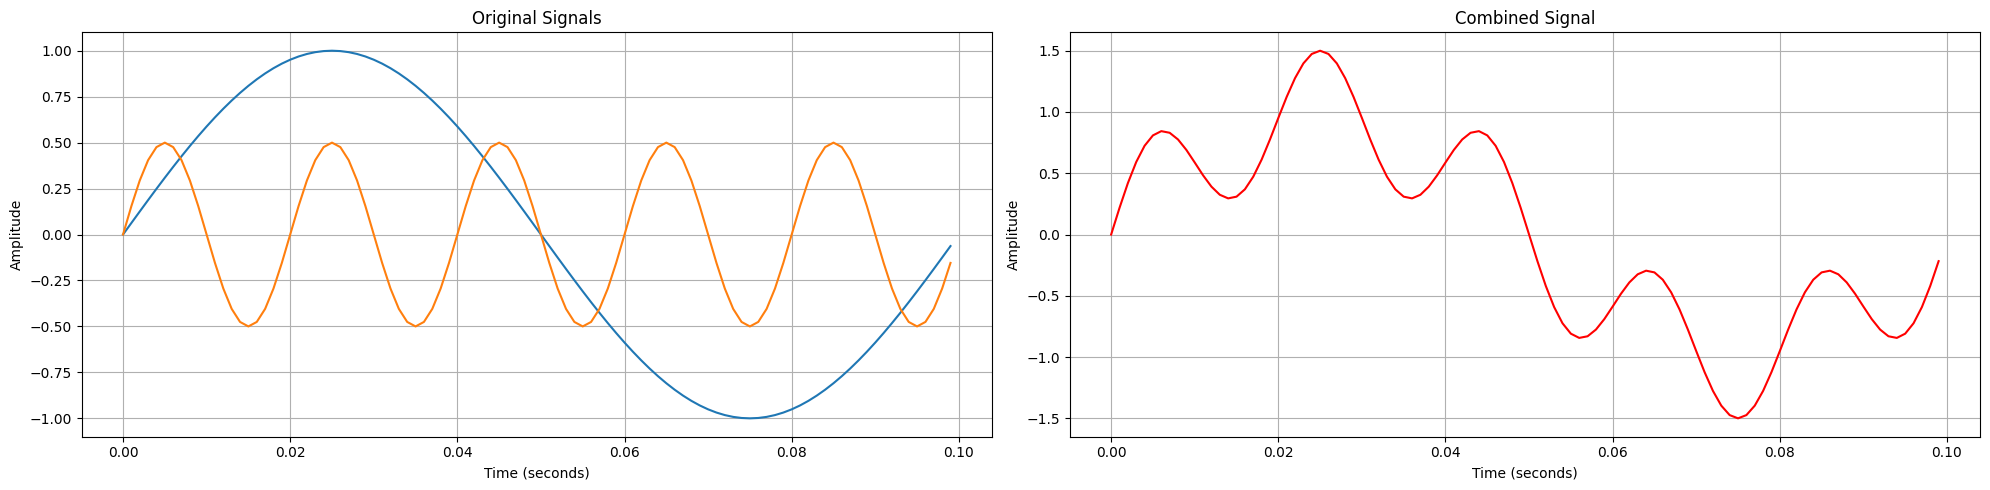

In [61]:
# Define signal parameters
N = 1024       
T = 1.0 / 1000  # sampling rate = 1000 Hz
t = np.linspace(0.0, N*T, N, endpoint=False)  

# Create a signal: sum of two sine waves (10 Hz and 50 Hz)
f1, f2 = 10, 50  # Frequencies in Hz
signal_1_u = np.sin(2.0 * np.pi * f1 * t)
signal_2_u = 0.5 * np.sin(2.0 * np.pi * f2 * t)
signal_sum = signal_1_u + signal_2_u

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(t[:100], signal_1_u[:100])
plt.plot(t[:100], signal_2_u[:100])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original Signals')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t[:100], signal_sum[:100], color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Combined Signal')
plt.grid()

plt.tight_layout()
plt.show()

### Fourier Transform - A saviour from frequency domain!
<b>The power spectrum of a function is a positive real-valued function of the frequency that quantifies the contribution of each frequency f to the total signal.</b>

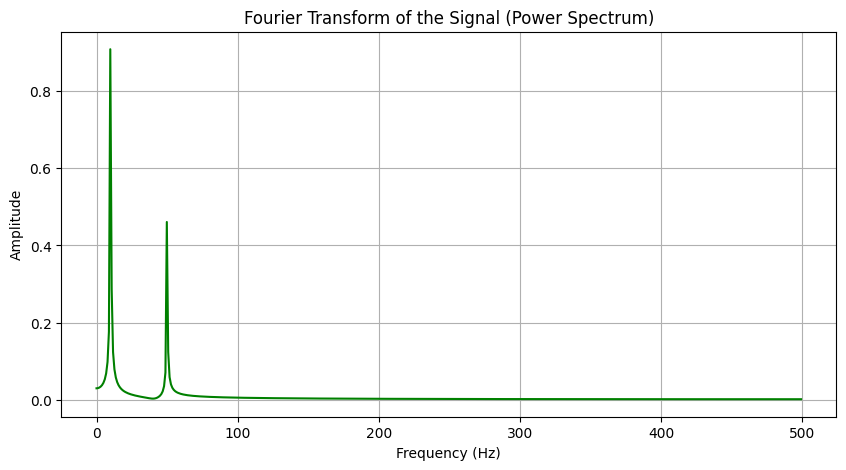

In [62]:
# Compute Fourier Transform using numpy
fft_signal = np.fft.fft(signal_sum)
freqs = np.fft.fftfreq(N, d=T)

# Plot the power spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], 2.0/N * np.abs(fft_signal[:N//2]), color='green')  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of the Signal (Power Spectrum)')
plt.grid()
plt.show()

## Level 2: 'Real World' signal comes with a component of noise

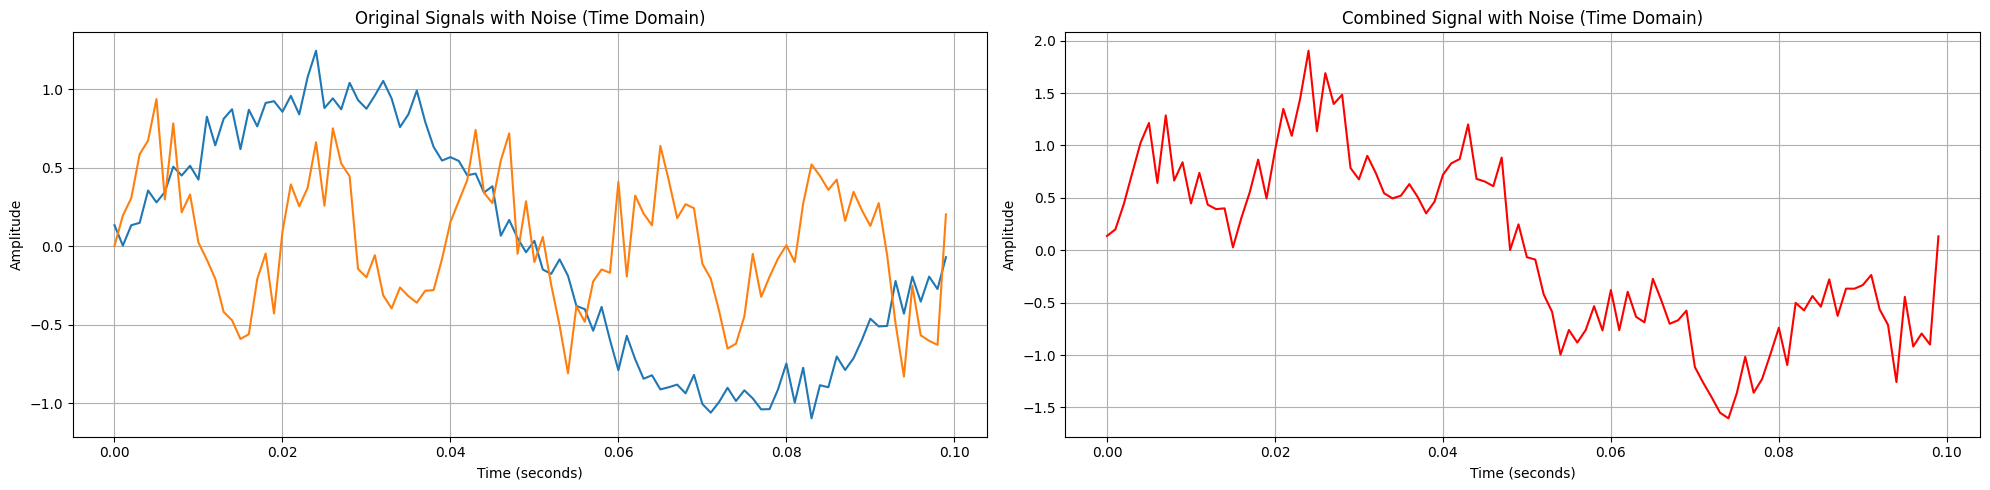

In [4]:
f1, f2 = 10, 50  # Frequencies in Hz
signal_1_u = np.sin(2.0 * np.pi * f1 * t)
signal_2_u = 0.5 * np.sin(2.0 * np.pi * f2 * t)
signal_sum = signal_1_u + signal_2_u

# Add random noise to the signals
noise_1 = np.random.normal(0, 0.1, N)  # Mean=0, std=0.1 for signal_1_u
noise_2 = np.random.normal(0, 0.2, N)  # Mean=0, std=0.1 for signal_2_u
signal_1_u += noise_1
signal_2_u += noise_2

# Combine the signals
signal_sum = signal_1_u + signal_2_u

# Plot the original signal
plt.figure(figsize=(20, 5))

# First subplot (signal_1_u and signal_2_u with noise)
plt.subplot(1, 2, 1)
plt.plot(t[:100], signal_1_u[:100])
plt.plot(t[:100], signal_2_u[:100])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original Signals with Noise (Time Domain)')
plt.grid()

# Second subplot (signal_sum with noise)
plt.subplot(1, 2, 2)
plt.plot(t[:100], signal_sum[:100], color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Combined Signal with Noise (Time Domain)')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


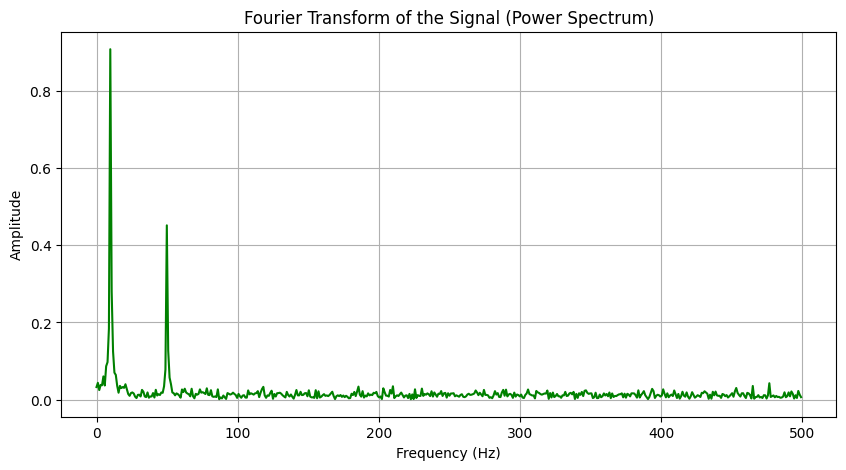

In [5]:
# Compute Fourier Transform using numpy
fft_signal = np.fft.fft(signal_sum)
freqs = np.fft.fftfreq(N, d=T)

# Plot the power spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], 2.0/N * np.abs(fft_signal[:N//2]), color='green')  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of the Signal (Power Spectrum)')
plt.grid()
plt.show()

## Level 3:  Nothing is continuous - Introducing 'Window functions'

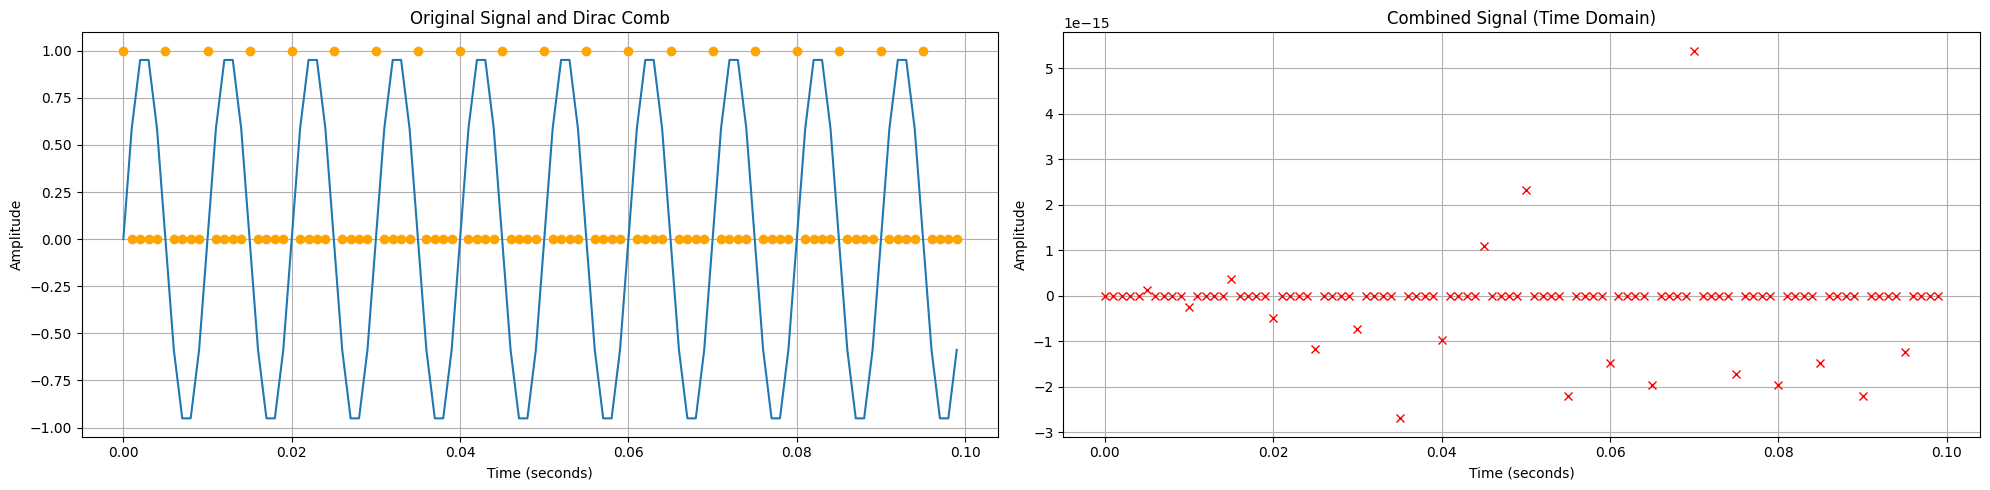

In [63]:
f1 = 100
signal_1_u = np.sin(2.0 * np.pi * f1 * t)

# Create a Dirac comb signal (periodic impulse train)
period = 5  # Period of impulses (spacing between impulses in samples)
dirac_comb = np.zeros(N)
dirac_comb[::period] = 1  # Set 1s at intervals defined by the period

signal_sum = signal_1_u * dirac_comb

# Plot the original signal
plt.figure(figsize=(20, 5))

# First subplot (signal_1_u and signal_sum)
plt.subplot(1, 2, 1)
plt.plot(t[:100], signal_1_u[:100])
plt.plot(t[:100], dirac_comb[:100], marker='o', linestyle='None', color='orange')  
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original Signal and Dirac Comb')
plt.grid()

# Second subplot (signal_2_u only)
plt.subplot(1, 2, 2)
plt.plot(t[:100], signal_sum[:100], marker='x', linestyle='None', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Combined Signal (Time Domain)')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

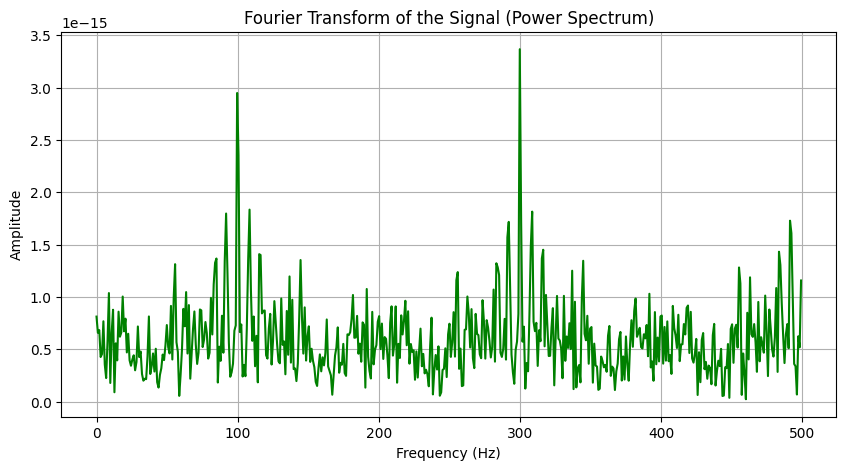

In [7]:
# Compute Fourier Transform using numpy
fft_signal = np.fft.fft(signal_sum)
freqs = np.fft.fftfreq(N, d=T)

# Plot the power spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], 2.0/N * np.abs(fft_signal[:N//2]), color='green')  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of the Signal (Power Spectrum)')
plt.grid()
plt.show()

## Level 4: Astronomy measurements are almost always non-uniform!

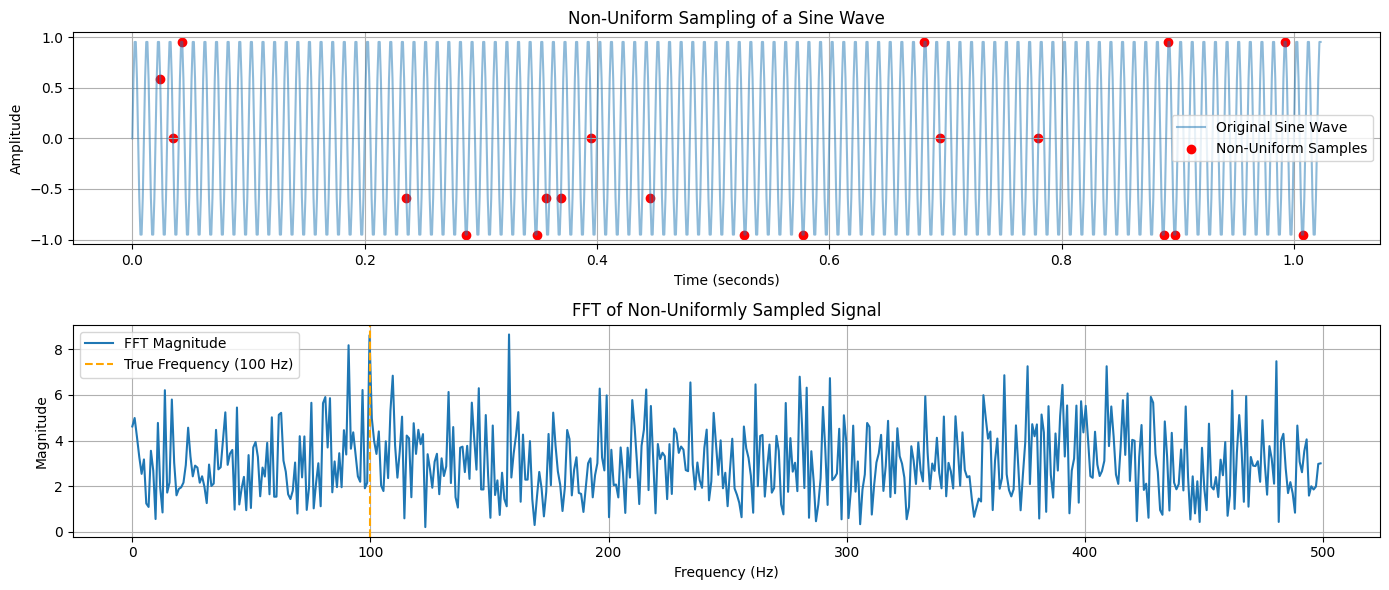

In [8]:
# Define signal parameters
N = 1024        # Total time samples (not actual sampled points)
T = 1.0 / 1000  # Sample spacing (Sampling rate = 1000 Hz)
t = np.linspace(0.0, N*T, N, endpoint=False)  # Uniform time array

# Generate a pure sine wave
f1 = 100  # True frequency of the signal
signal = np.sin(2.0 * np.pi * f1 * t)

# Create a non-uniform sampling pattern (intentionally irregular)
num_samples = 20  # Sparse and non-uniform sampling
sampled_indices = np.sort(np.random.choice(N, num_samples, replace=False))  # Random unique indices
t_sampled = t[sampled_indices]  # Select non-uniform time points
signal_sampled = signal[sampled_indices]  # Sample the sine wave at those points

# Compute FFT on the non-uniformly sampled signal (Zero-filled for missing samples)
fft_input = np.zeros(N)
fft_input[sampled_indices] = signal_sampled  # Only use sampled values, zero elsewhere
fft_output = fft(fft_input)
frequencies = fftfreq(N, T)

# Plot original signal and sampled signal
plt.figure(figsize=(14, 6))

# Plot time domain signals
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Sine Wave', alpha=0.5)
plt.scatter(t_sampled, signal_sampled, color='red', label='Non-Uniform Samples')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Non-Uniform Sampling of a Sine Wave')
plt.legend()
plt.grid()

# Plot FFT result
plt.subplot(2, 1, 2)
plt.plot(frequencies[:N // 2], np.abs(fft_output[:N // 2]), label="FFT Magnitude")
plt.axvline(x=f1, color='orange', linestyle='--', label='True Frequency (100 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Non-Uniformly Sampled Signal')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Level 5: Lomb-Scargle Periodogram rescues non-uniform signals

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:102: RuntimeWarning: invalid value encountered in divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


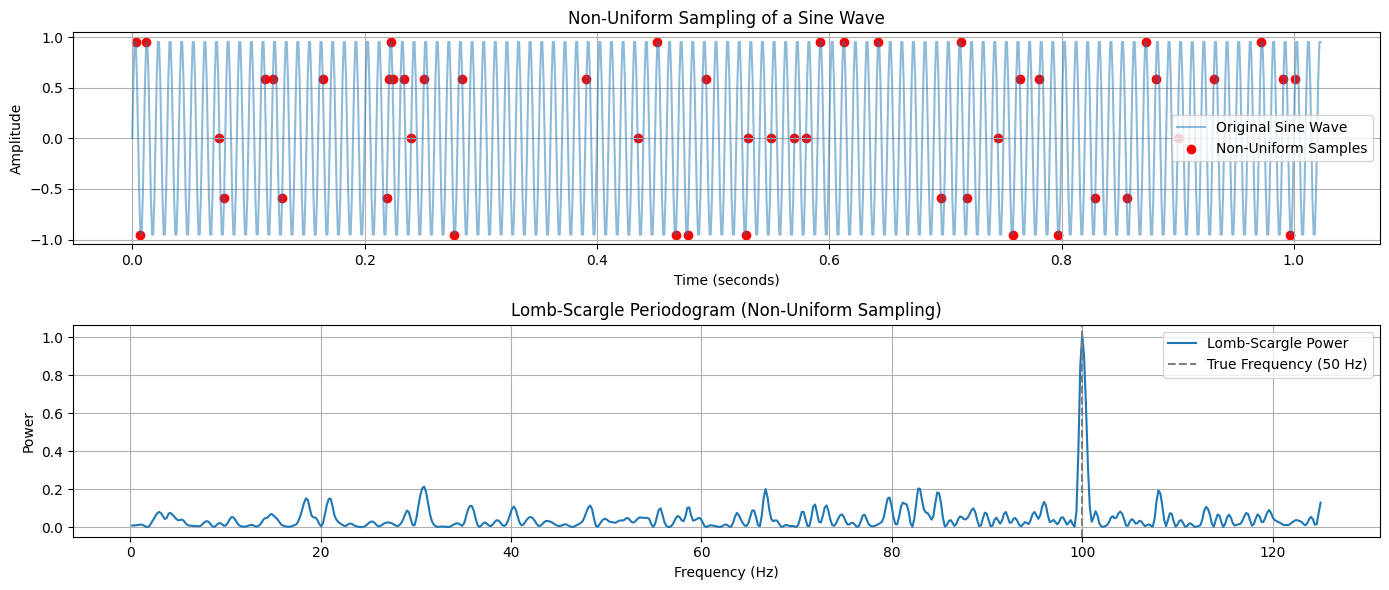

In [30]:
# Define signal parameters
N = 1024        # Total time samples (not actual sampled points)
T = 1.0 / 1000  # Sample spacing (Sampling rate = 1000 Hz)
t = np.linspace(0.0, N*T, N, endpoint=False)  # Uniform time array

# Generate a pure sine wave
f1 = 100  # True frequency of the signal
signal = np.sin(2.0 * np.pi * f1 * t)

# Create a non-uniform sampling pattern
num_samples = 50  # Sparse sampling
sampled_indices = np.sort(np.random.choice(N, num_samples, replace=False))  # Random unique indices
t_sampled = t[sampled_indices]  # Select non-uniform time points
signal_sampled = signal[sampled_indices]  # Sample the sine wave at those points

# Compute Lomb-Scargle Periodogram
# frequencies = np.linspace(1, 500, 1000)  # Frequency range to search (1 to 500 Hz)
# angular_frequencies = 2 * np.pi * frequencies  # Convert to angular frequency
# power = lombscargle(t_sampled, signal_sampled, angular_frequencies, normalize=True)

ls = LombScargle(t_sampled, signal_sampled)
frequencies, power = ls.autopower(minimum_frequency=0,
                           maximum_frequency=125)

# Plot original signal and sampled signal
plt.figure(figsize=(14, 6))

# Time Domain Plot
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Sine Wave', alpha=0.5)
plt.scatter(t_sampled, signal_sampled, color='red', label='Non-Uniform Samples')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Non-Uniform Sampling of a Sine Wave')
plt.legend()
plt.grid()

# Frequency Domain Plot (Lomb-Scargle)
plt.subplot(2, 1, 2)
plt.plot(frequencies, power, label="Lomb-Scargle Power")
plt.axvline(x=f1, color='gray', linestyle='--', label='True Frequency (50 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram (Non-Uniform Sampling)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## Level 6: TESS target TOI-1181-b (deriving period from lightcurve)

Best period: 2.101985393160808 days


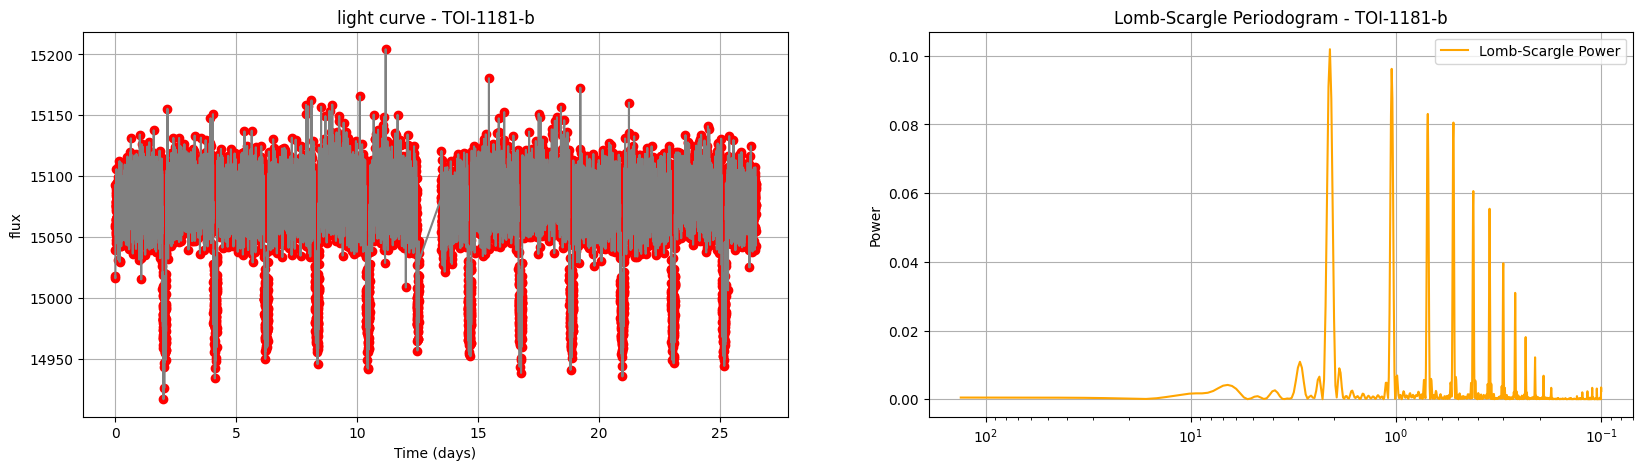

In [59]:
target = "TOI-1181-b"
lc = pd.read_csv('TOI-1181-b.csv')
lc = lc.dropna(subset=['flux'])

time = (lc['time'] - lc['time'][0])
flux = lc['flux']
ls = LombScargle(time, flux)
frequency, power = ls.autopower(minimum_frequency=0, maximum_frequency=10)
period = 1. / frequency

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(time, flux, color='red', marker='o', linestyle='None')
plt.plot(time, flux, color='gray')
plt.xlabel('Time (days)')
plt.ylabel('flux')
plt.title('light curve - '+target)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(period, power, color='orange', label="Lomb-Scargle Power")
plt.xscale("log")  
# plt.xlim(right=1)
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram - "+target)
plt.legend()
plt.gca().invert_xaxis()  # Invert x-axis so shorter periods appear on the left
plt.grid()

best_period = period[np.nanargmax(power)]
print(f"Best period: {best_period} days")

## Phase-Folding the above Light Curve

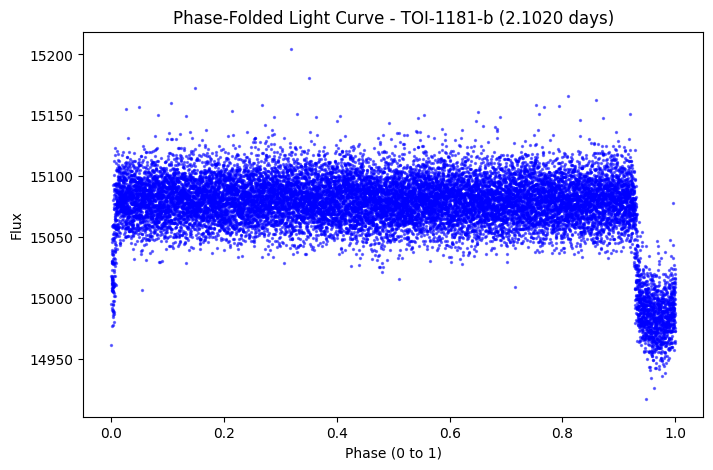

In [60]:
phase = ((time % best_period) / best_period)  # Normalize phase (0 to 1)
sorted_indices = np.argsort(phase)
phase_sorted = phase[sorted_indices]
flux_sorted = flux[sorted_indices]

plt.figure(figsize=(8, 5))
plt.scatter(phase_sorted, flux_sorted, s=2, color='blue', alpha=0.5)
plt.xlabel("Phase (0 to 1)")
plt.ylabel("Flux")
plt.title(f"Phase-Folded Light Curve - {target} ({best_period:.4f} days)")
plt.show()

## Level 7: Now, this TESS target, TOI-2202-b has perturbers

<i><b>Due to the presence of perturbers (or orbital decay), the centre of transit starts shifting across observations, we see the base of spike broadened</i></b>

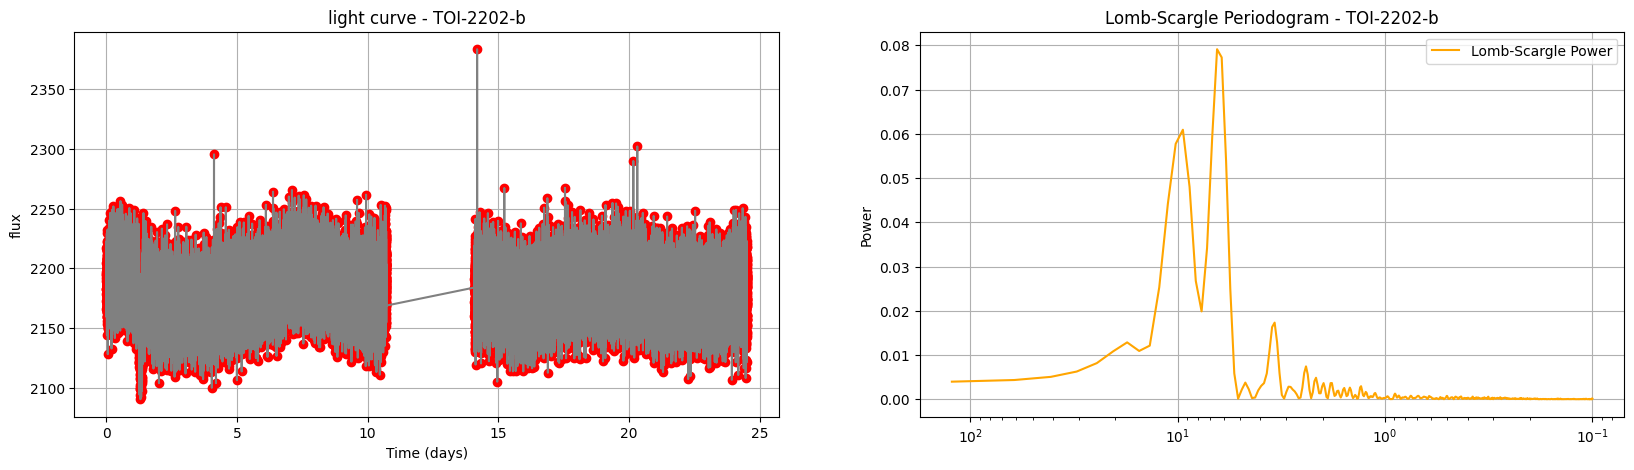

In [58]:
target = "TOI-2202-b"
lc = pd.read_csv('TOI-2202-b.csv')
lc = lc.dropna(subset=['flux'])

time = (lc['time'] - lc['time'][0])
flux = lc['flux']
ls = LombScargle(time, flux)
frequency, power = ls.autopower(minimum_frequency=0, maximum_frequency=10)
period = 1. / frequency

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(time, flux, color='red', marker='o', linestyle='None')
plt.plot(time, flux, color='gray')
plt.xlabel('Time (days)')
plt.ylabel('flux')
plt.title('light curve - '+target)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(period, power, color='orange', label="Lomb-Scargle Power")
plt.xscale("log")  
# plt.xlim(right=1)
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram - "+target)
plt.legend()
plt.gca().invert_xaxis()  # Invert x-axis so shorter periods appear on the left
plt.grid()